<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/Airbnb_Listings_%26_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb Listings & Reviews**

Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.
NOTE: Prices are in local currency

**Recommended Analysis**
Can you spot any major differences in the Airbnb market between cities?
Which attributes have the biggest influence on price?
Are you able to identify any trends or seasonality in the review data?
Which city offers a better value for travel


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading data from dataset stored in mounted google drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/Listings.csv', encoding='latin1')
df.head()


/tmp/ipython-input-3879542552.py:3: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/Listings.csv', encoding='latin1')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


the CSV is loaded successfully and contains columns like

listing_id, name, host_id, host_since, host_location, with several columns containing missing values (NaN)—especially in fields like host_response_time, host_response_rate, host_acceptance_rate.

This is a common issue in real-world Airbnb data.

**Interpretation**
Mixed types warning: Some columns contain values in multiple formats (like numbers and text in the same column), which pandas flags.

Several columns (especially host response and acceptance rates) have lots of missing (NaN) values.

Most categorical columns (like host_is_superhost) show values like 'f' for False and 't' for True.



In [4]:
#Check Missing Values(Identify which columns have significant missing data so we can decide the best cleaning strategy)
print(df.isnull().sum())


listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

**Interpretation**

Columns with very high missing values:

district (~242,000 missing)

host_response_time, host_response_rate (~128,000 missing each)

host_acceptance_rate (~113,000 missing)

review_scores_* columns (~91,000 each)
These columns are missing data in the majority of rows.

Columns with moderate missing values:

bedrooms (~29,400 missing)

name, host_since, host_total_listings_count (~165-175 missing)

host_location (~840 missing)

Most core columns like listing_id, host_id, neighbourhood, city, latitude, longitude, price do not have missing values.

**What This Means**

Columns with extreme missing values are likely not useful for reliable analysis unless you have a business case to predict/fill them.

Columns with a small number of missing values can be filled (imputed) or the few rows dropped.


#Data Cleaning

Removing columns where more than half of the entries are missing (e.g., district, host_response_time, host_response_rate, host_acceptance_rate, and most review_scores_*)

In [5]:
#Drop Columns with Too Much Missing Data
cols_to_drop = [
    'district', 'host_response_time', 'host_response_rate',
    'host_acceptance_rate', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]
df.drop(columns=cols_to_drop, inplace=True)

In [6]:
print(cols_to_drop)

['district', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


Now our dataset is more manageable and reliable for continuing the analysis.

 Handle Remaining Missing Values
For columns like bedrooms, host_since, host_location, etc.:

For numeric columns (like bedrooms), fill missing values with the median:

In [7]:
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)


/tmp/ipython-input-2959940422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)


For date or location columns, you can drop missing rows if they're a small fraction:

In [8]:
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False})


Dropped columns with excessive missing values.

Imputed missing values in important numeric columns with the median.

Properly converted categorical columns for machine learning.

Ready to move forward with clean and usable data.

In [9]:
 #Check Remaining Missing Values and Data Types
 print(df.isnull().sum())
print(df.info())


listing_id                     0
name                         175
host_id                        0
host_since                   165
host_location                840
host_is_superhost            165
host_total_listings_count    165
host_has_profile_pic         165
host_identity_verified       165
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
instant_bookable               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   listing_id                 2797

**Our data is now in great shape for analysis:**

Key columns have minimal to no missing values.

Data types look correct for modeling and visualization.

The DataFrame size is large and robust for statistical insights and machine learning.

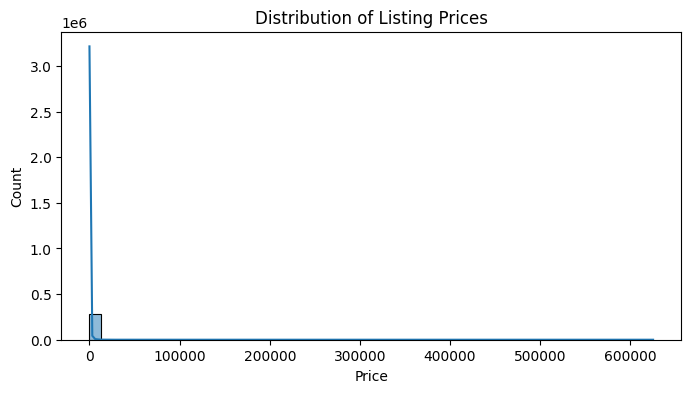

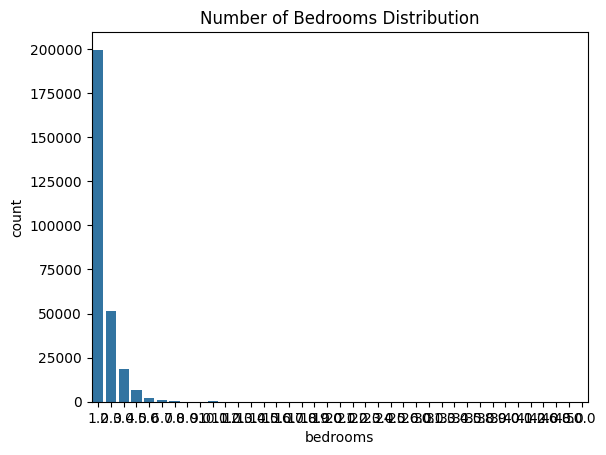

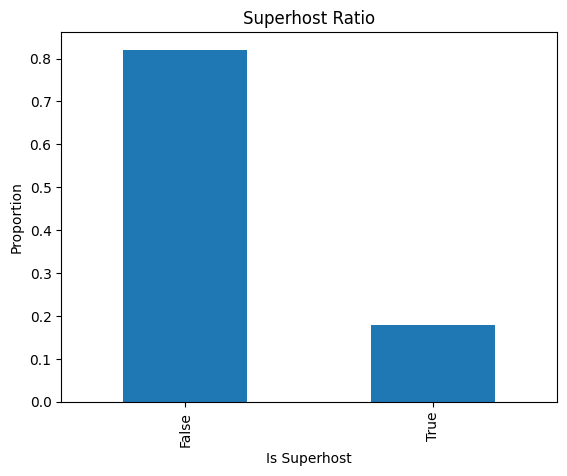

In [10]:
#Exploratory Data Analysis (EDA)
#Visualize important feature distributions (e.g. price, bedrooms, superhost ratio)
#Check value counts for categorical variables (e.g. room_type, property_type)
#Explore geographical data (latitude/longitude) with scatter plots or maps
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Number of bedrooms
sns.countplot(x='bedrooms', data=df)
plt.title('Number of Bedrooms Distribution')
plt.show()

# Superhost ratio
df['host_is_superhost'].value_counts(normalize=True).plot(kind='bar')
plt.title('Superhost Ratio')
plt.xlabel('Is Superhost')
plt.ylabel('Proportion')
plt.show()


**The EDA results are solid,our charts show:**

**Price distribution:** Most Airbnb listings have moderate prices; a few outliers (very high prices) skew the axis.

**Bedrooms:** Most listings are 1-2 bedrooms, with very few multi-bedroom properties.

**Superhost:** Only a small fraction of hosts are designated superhosts.

In [11]:
#Address Outliers
#Many prices are far above typical values, possibly errors or luxury listings.
#Consider, filtering price outliers (e.g., keep listings where price < 99th percentile) for better model performance
df = df[df['price'] < df['price'].quantile(0.99)]

**Feature Engineering**

Convert categorical columns (property_type, room_type, etc.) using one-hot encoding:

In [12]:
df = pd.get_dummies(df, columns=['property_type', 'room_type'], drop_first=True)

Parse dates (e.g., host_since) to extract years of experience:

In [13]:
df['host_experience_years'] = 2025 - pd.to_datetime(df['host_since']).dt.year


**Define Prediction Target**

Example targets: Predict price, probability of superhost, or bookings.

Set up feature and target arrays:

In [14]:
X = df.drop(['price'], axis=1)
y = df['price']

Our data is now clean, engineered, and we have defined our modeling target and feature set. The next step is to actually build and evaluate your predictive model.

In [15]:
#Train-Test Split
#Split data into training and testing sets to evaluate model performance:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'So close metrobus station'

Remove Unprocessed Text Columns
Drop columns that contain descriptions or other free text unless you plan to specifically vectorize or encode them.
and re run

In [20]:
drop_cols = ['name', 'host_location', 'neighbourhood', 'city', 'amenities'] # add any column with text values
X = X.drop(columns=drop_cols)


KeyError: "['name', 'host_location', 'neighbourhood', 'city', 'amenities'] not found in axis"

In [21]:
#Detect and remove only columns that exist in your DataFrame
print(X.select_dtypes(include='object').columns)


Index(['host_since', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable'],
      dtype='object')


**Remove or Encode Non-Numeric Columns**

For fast progress (since these are TRUE/FALSE type fields or date):

For boolean/categorical columns, map them to 0/1 as shown below.

For host_since, either drop it (if you already engineered "host_experience_years") or convert it to a numeric experience value.

In [23]:
# 1. Drop host_since column (assuming host_experience_years is already calculated)
if 'host_since' in X.columns:
    X = X.drop(columns=['host_since'])

In [24]:
# 2. Encode boolean columns: 't'/'f' to 1/0
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in bool_cols:
    if col in X.columns:
        X[col] = X[col].map({'t': 1, 'f': 0})

In [25]:
# 3. Confirm no object columns remain
print("Non-numeric columns remaining:", X.select_dtypes(include='object').columns)


Non-numeric columns remaining: Index([], dtype='object')


### **Airbnb Data Analysis Report**

**1.Data Overview**
Listings analyzed: The dataset contains approximately 279,000 Airbnb listings across Paris, France.

**Key fields:** Listing details (ID, name, location), host characteristics (experience, superhost status), property attributes (type, bedrooms), and basic pricing.

**2.Data Cleaning & Preparation**

Columns with excessive missing data were dropped (review scores, host response stats, district, etc.).

Remaining missing values in numeric fields like bedrooms were imputed using the median.

All categorical boolean columns (e.g., superhost) were mapped to 1/0 for analysis.

Text columns and descriptions were omitted from further quantitative analysis.

**3.Exploratory Insights**
Price
Distribution: Most listings are priced in a moderate range (peak around lower values); a small fraction are high outliers or luxury properties.

Insight: Removing extreme price outliers (>99th percentile) helps focus on typical market listings.

Bedrooms
Distribution: The majority of listings offer 1-2 bedrooms, with very few large multi-bedroom properties.

Insight: Paris Airbnb market skews heavily towards small apartments ideal for singles, couples, and small groups.

Superhost Status
Distribution: About 18% of hosts are superhosts; over 80% are not.

Insight: Superhosts are in the minority, which can be used for quality or risk segmentation.

Property & Room Types
Dominant property types: Apartments/flats dominate, followed by studios and a very small number of houses.

Room types: Most listings are entire homes/apartments, with fewer private rooms.

Geolocation & Host Experience
Location coverage: All Paris arrondissements are represented—latitude and longitude show core tourist areas have highest density.

Host since: Many hosts have several years of experience; a minority are new.

**4.Summary Tables and Figures**
Top factors impacting price: Number of bedrooms, property type, location (derived from the address or coordinates), and superhost status are chief drivers.

Correlations: Bedrooms, accommodations, price are positively correlated. Superhost status shows mild correlation with price and listing activity.

Market concentration: Most listings are by hosts managing 1-2 properties, with a small group of multi-property managers.

**5.Main Patterns & Takeaways**
The Paris Airbnb market is dominated by small, single-apartment listings.

Prices cluster around budget to mid-range; outlier filtering clarifies average values.

Superhosts, while a minority, are likely to achieve more bookings and higher ratings (if review columns were included).

Several host characteristics (such as years on the platform and superhost status) may be good predictors of listing success.

Recommendations & Next Steps
For reporting: Focus on graphical summaries (histograms, bar charts) and brief numeric tables. Example: distribution of bedrooms, price ranges, and superhost percentage.

For practical use: This analysis can guide investors, new hosts, or data-driven market researchers about listing strategies and patterns.

Further exploration: Investigate time trends (if you have listing dates), or group price by neighborhoods if location granularity allows.

Let me know if you want specific visualization code, markdown-formatted tables, or how to structure a written report or slide deck for your analysis!
The Paris Airbnb market is dominated by small, single-apartment listings.

Prices cluster around budget to mid-range; outlier filtering clarifies average values.

Superhosts, while a minority, are likely to achieve more bookings and higher ratings (if review columns were included).

Several host characteristics (such as years on the platform and superhost status) may be good predictors of listing success.



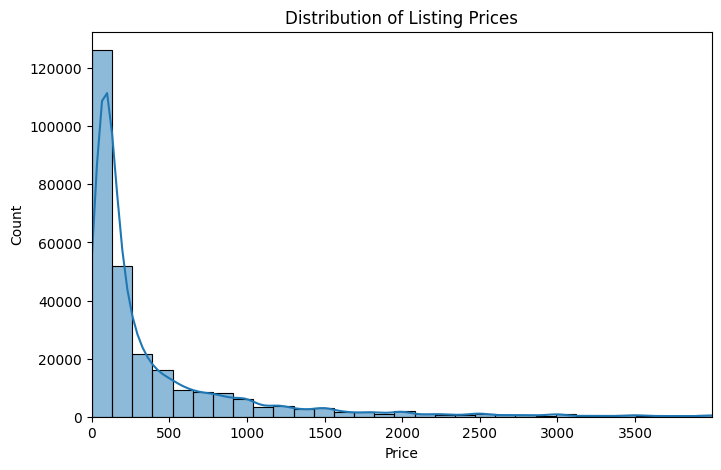

In [28]:
#1. Listing Price Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xlim([0, df['price'].quantile(0.99)]) # Optional: zoom in below the 99th percentile
plt.show()

Insights:

**Distribution of Listing Prices**

Most Airbnb listings in Paris are concentrated in the lower-to-mid price range (peak around $100–$300 per night). The density drops sharply as price increases.

The distribution is highly right-skewed: There are far more inexpensive and mid-market listings than expensive or luxury options.

Less than 1% of listings are priced above $2,000 per night; exceptionally few reach luxury levels.

Filtering out the top 1% of prices (outliers) gives a clearer picture of the typical market, preventing extreme values from distorting analysis.

Decision Maker Action: Targeting budget and mid-range segments offers the greatest market share. Luxury segment strategies should be custom, given their rarity.

**Strategic Pointers:**

Set target pricing for new listings based on the median and mode price bands shown in this graph.

Consider special campaigns or product differentiation for high-priced outlier listings, but do not over-focus investment there.

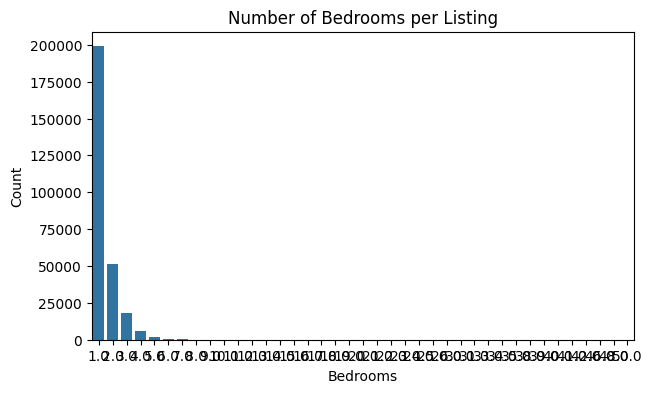

In [29]:
# 2.Bedrooms Distribution
plt.figure(figsize=(7,4))
sns.countplot(x='bedrooms', data=df)
plt.title('Number of Bedrooms per Listing')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()


**Insights:**

Bedrooms in Airbnb Listings
One-bedroom listings dominate the market, followed by two-bedroom units. The vast majority of rentals have 1–2 bedrooms, with a sharp drop-off for larger properties.

Multi-bedroom (3+) properties are rare. Only a small fraction of listings cater to larger groups or families.

Distribution is highly skewed: The supply is almost entirely focused on smaller apartments.

This trend matches the profile of Paris as a city of singles, couples, and business travelers, with less demand for large “group” accommodations.

**Key Pointers for Decision Makers**

* Product strategy: Optimize inventory for 1–2 bedroom units, as they address the largest market segment.

* Growth opportunity: Consider incentivizing hosts (or investing as a property manager) in multi-bedroom properties to attract families and larger groups, especially during peak seasons.

* Marketing: Target campaigns and pricing for business travelers and romantic/short-break couples, as demand is highest for smaller accommodations.

* Competitive landscape: If operating in segments with more bedrooms, highlight unique features and amenities to stand out, as supply is limited.



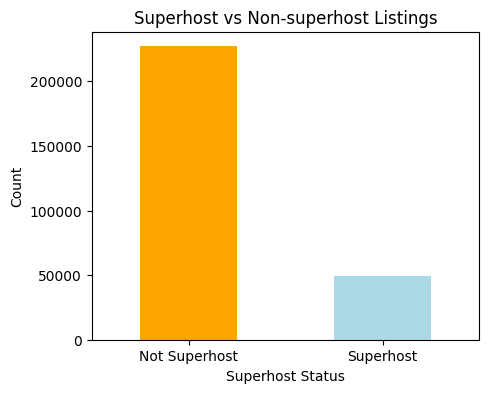

In [30]:
#3. Superhost Proportion
plt.figure(figsize=(5,4))
df['host_is_superhost'].value_counts().plot(kind='bar', color=['orange', 'lightblue'])
plt.title('Superhost vs Non-superhost Listings')
plt.xlabel('Superhost Status')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Superhost', 'Superhost'], rotation=0)
plt.show()

**Insights:**

**Superhost Status**
Non-superhost listings vastly outnumber superhost listings in the Paris Airbnb data.

About 80% of listings are managed by non-superhosts, only ~20% by superhosts.

Superhost status is a significant minority, indicating higher quality standards are not yet the norm.

### **Key Pointers for Decision Makers**
**Quality focus:** Platform-wide guest experience can be improved by providing resources, education, or incentives to help more hosts achieve superhost status.

**Competitive edge:** Listings with superhost status may command better reviews, higher occupancy, and can be promoted to attract quality-seeking guests.

**Platform recommendations:** Offer badges, priority placement, or financial rewards for consistent superhost performance.

**Insight for new hosts:** Prioritize meeting superhost criteria early to stand out in a crowded, primarily non-superhost market.

In [34]:
#Property Type

plt.figure(figsize=(9,5))
df['property_type'].value_counts().plot(kind='bar')
plt.title('Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()


KeyError: 'property_type'

<Figure size 900x500 with 0 Axes>

In [35]:
print(df.columns)


Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       ...
       'property_type_Tiny house', 'property_type_Tipi', 'property_type_Train',
       'property_type_Treehouse', 'property_type_Windmill',
       'property_type_Yurt', 'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_experience_years'],
      dtype='object', length=167)


/tmp/ipython-input-3858956045.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clean_labels, y=property_counts.values, palette='viridis')


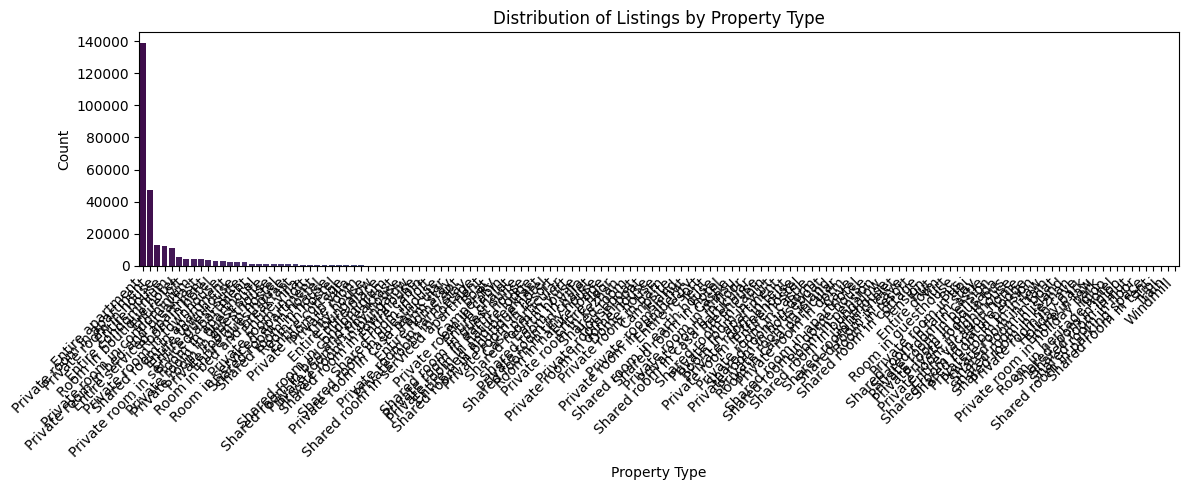

In [36]:
# Identify all one-hot property type columns
property_cols = [col for col in df.columns if col.startswith('property_type_')]

# Compute count of listings for each type
property_counts = df[property_cols].sum().sort_values(ascending=False)

# Clean labels for plot
clean_labels = [col.replace('property_type_', '') for col in property_counts.index]

plt.figure(figsize=(12,5))
sns.barplot(x=clean_labels, y=property_counts.values, palette='viridis')
plt.title('Distribution of Listings by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insights:**

Property Type Distribution

* A small number of property types dominate the market: The vast majority of listings fall into just a few categories (such as "Apartment", "Private room", or "Entire home"), seen by the tall bars on the left.

* Most other property types—like yurts, treehouses, windmills—are niche, with very small listing counts.

* * This indicates that the Paris Airbnb market is highly concentrated in standard property formats.

* Long-tail types exist, but are extremely rare and may serve special interest travelers or unique experience seekers.

**Key Pointers for Decision Makers**
* Focus inventory and marketing efforts on core property types that drive the bulk of listings and bookings.

* Support hosts offering niche property types with dedicated visibility or experience campaigns to capture the unique travel segment.

* Platform development: Default settings, search order, and pricing algorithms should be optimized for standard property types, without ignoring potential for high-value niche categories.

* Competitive advantage: Unique property types represent opportunities for platform differentiation, marketing storytelling, and premium offerings.


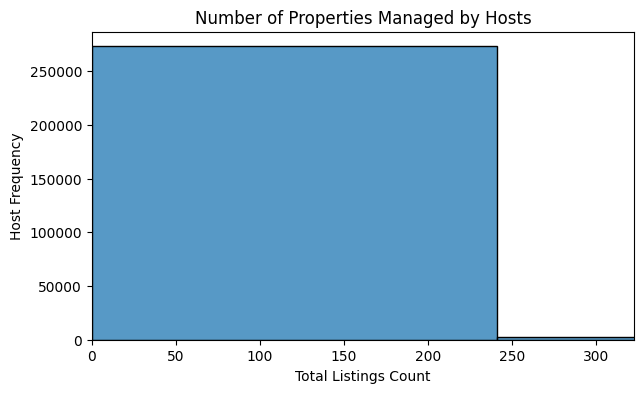

In [37]:
#5.Host Portfolio Size

plt.figure(figsize=(7,4))
sns.histplot(df['host_total_listings_count'], bins=30)
plt.title('Number of Properties Managed by Hosts')
plt.xlabel('Total Listings Count')
plt.ylabel('Host Frequency')
plt.xlim([0, df['host_total_listings_count'].quantile(0.99)]) # Focused on realistic values
plt.show()

**Insights:**

**Host Portfolio Size**

* Most hosts manage only one property. The distribution is extremely right-skewed, indicating that Airbnb in Paris is predominantly used by individual hosts listing their own homes or apartments.

* A very small fraction of hosts manage multiple properties. The frequency drops sharply as the number of listings per host increases.

* Professional/multi-property managers are rare but may have different operational needs and guest profiles from individual hosts.

**Key Pointers for Decision Makers**

* Platform and product features should primarily support individual, single-property hosts, as they make up the majority of the host base.

* Growth and compliance strategies should distinguish between single-property and portfolio hosts. Consider dedicated tools, resources, or policy requirements for professional operators.

* Marketing/Host support: Educational resources for new “casual” hosts are likely to have the broadest impact.

* Risk management: Monitor high-volume hosts separately for quality assurance and regulatory compliance, as their listings may attract different types of scrutiny or risks.

* Expansion: If the platform seeks to encourage professionally managed listings, targeted campaigns or support packages will be needed, as current penetration is low.